In [10]:
from surprise import SVD, Reader, Dataset, KNNWithMeans, KNNBaseline
from surprise import evaluate, print_perf
from surprise.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#------------------------load data from a file
file_path = 'data/ratings.csv'
ratings = pd.read_csv(file_path, sep=",")
reader = Reader()
ratings.drop("timestamp", axis=1, inplace=True)
data = Dataset.load_from_df(ratings, reader=reader)

#########---------------SVD
# print('')
print('---------------SVD result-------------')

svd_rmse = []
ks = [10, 20, 50, 100, 200]
i = 0
while i < 5:
    algo = SVD(n_factors=ks[i])
    perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    rmse = np.sum(perf['test_rmse'])/perf['test_rmse'].size
    svd_rmse.append(rmse)
    i += 1

print(svd_rmse)


---------------SVD result-------------
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8722  0.8688  0.8712  0.8672  0.8678  0.8695  0.0019  
MAE (testset)     0.6702  0.6667  0.6703  0.6665  0.6676  0.6683  0.0017  
Fit time          1.67    1.79    1.64    1.62    1.68    1.68    0.06    
Test time         0.19    0.13    0.18    0.19    0.19    0.18    0.02    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8767  0.8728  0.8671  0.8554  0.8705  0.8685  0.0073  
MAE (testset)     0.6730  0.6698  0.6672  0.6581  0.6695  0.6675  0.0050  
Fit time          2.26    2.24    3.11    2.73    3.00    2.67    0.36    
Test time         0.13    0.15    0.22    0.20    0.34    0.21    0.07    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4 

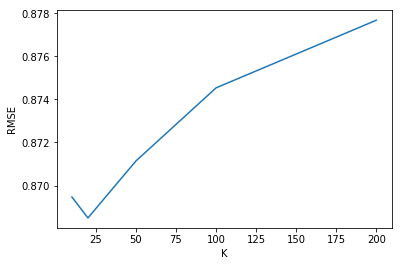

In [11]:
plt.plot(ks, svd_rmse)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


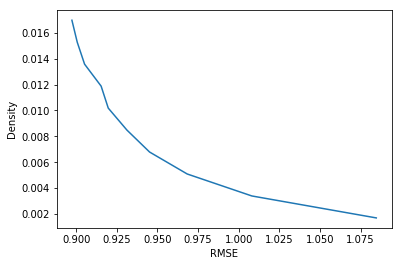

In [12]:
ratings = ratings.sample(frac=1)
knn_with_means_rmse = []
knn_with_baseline_rmse = []
densities = []
for i in np.linspace(0.1,1,10):
    # toggle density
    threshold = int(i * len(ratings))
    new_ratings = ratings[:threshold]
    density = new_ratings.shape[0] / (610 * 9742)
    densities.append(density)
    data = Dataset.load_from_df(new_ratings, reader)
    
    # Cross validation to calculate RMSE for KNN-Mean
    algo = KNNWithMeans()
    cv_baseline = cross_validate(algo, data, measures=['RMSE'], cv=5)
    knn_with_means_rmse.append(np.sum(cv_baseline['test_rmse'])/cv_baseline['test_rmse'].size)
    
    # Cross validation to calculate RMSE for KNN-baseline
    algo = KNNBaseline()
    cv_svd = cross_validate(algo, data, measures=['RMSE'], cv=5)
    knn_with_baseline_rmse.append(np.sum(cv_svd['test_rmse'])/cv_svd['test_rmse'].size)

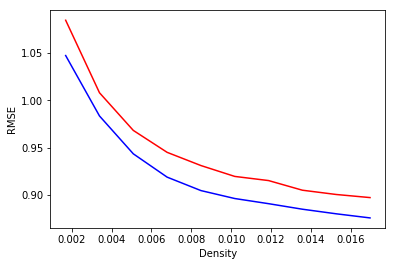

In [14]:
plt.plot(densities, knn_with_means_rmse, 'r')
plt.plot(densities, knn_with_baseline_rmse, 'b')
plt.xlabel("Density")
plt.ylabel("RMSE")
plt.show()